In [2]:
import cv2
import os
import glob
import math
import numpy as np
import pandas as pd

import config
import matplotlib.pyplot as plt
from cleaning_with_coordinate_clustering import VideoReader, Metadata

face_coordinates = pd.read_json(config.FACE_COORDINATES_PATH).T

In [14]:
all_coordinate_files = glob.glob(os.path.dirname(config.FACE_COORDINATES_PATH) +'/*.json')

In [30]:
# no face detected
total = 0
for file in all_coordinate_files:
    face_coordinates = pd.read_json(file).T
    no_face_videos = face_coordinates[face_coordinates.isnull().all(1)==True]
    if len(no_face_videos) > 0:
        print(os.path.basename(file), no_face_videos.index.to_list())
        total+=len(no_face_videos)
print(f'Total is {total}')

face_coordinates_step30_12.json ['ulubxioaxe.mp4']
face_coordinates_step30_19.json ['ehzjkbkwps.mp4', 'xiqbkvdpzy.mp4', 'tmzwuptonj.mp4']
face_coordinates_step30_21.json ['ndvssqditd.mp4', 'jwerbdhrmu.mp4', 'wzuqittcvn.mp4']
face_coordinates_step30_24.json ['orkbzcydjv.mp4', 'ykfqrgnyrf.mp4', 'gsxhrxrxyp.mp4', 'eitdwgzbtn.mp4']
face_coordinates_step30_28.json ['atvmxvwyns.mp4', 'qeumxirsme.mp4', 'gbqrgajyca.mp4', 'fysyrqfguw.mp4', 'mfnowqfdwl.mp4', 'zhfyuhonra.mp4']
face_coordinates_step30_31.json ['zhvpotrxsq.mp4', 'ucqvmhltqw.mp4', 'frtcdhlsmj.mp4', 'ltpywknqaz.mp4']
face_coordinates_step30_32.json ['ezvpacuegj.mp4', 'ffhlqnapse.mp4']
face_coordinates_step30_33.json ['fbqzjrziud.mp4']
face_coordinates_step30_34.json ['hkpsxworpo.mp4']
face_coordinates_step30_36.json ['emffqrjhyk.mp4']
face_coordinates_step30_38.json ['mxuviiuuks.mp4', 'qhgatctqbg.mp4', 'mrkzdchbtj.mp4', 'zixbqrfzvg.mp4']
Total is 30


In [36]:
len(all_coordinate_files)

39

In [25]:
total = 0
total_video_count = 0
part_counter = 0

for file in all_coordinate_files:
    part_counter += 1
    face_coordinates = pd.read_json(file).T
    
    total_video_count += len(face_coordinates)
    all_face = face_coordinates[face_coordinates.notna().sum(1) > 10]
    if len(all_face) > 0:
        total += len(all_face)
print(total)

701


In [28]:
336*128

43008

In [26]:
1386+701

2087

In [22]:
face_coordinates[face_coordinates.notna().sum(1) < 9]

0   \
yiqdjbotyg.mp4  [[545.4766845703125, 187.53790283203125, 694.2...   
qdiclkoxze.mp4  [[501.8109436035156, 197.6351776123047, 662.36...   
vvysgggofo.mp4  [[234.22776794433594, 561.3115234375, 375.8774...   
oyfnmrxqkh.mp4  [[139.69097900390625, 68.80762481689453, 174.2...   
sezddfsbzd.mp4  [[515.4822998046875, 203.70970153808594, 664.5...   
xiprlcbxxd.mp4  [[526.4505615234375, 206.39146423339844, 678.5...   
rsvrohepud.mp4  [[219.33279418945312, 560.3074951171875, 361.8...   
cyxtasgppy.mp4  [[509.08740234375, 218.08653259277344, 660.377...   
cracconkyr.mp4  [[342.531005859375, 553.7257690429688, 503.160...   

                                                               1   \
yiqdjbotyg.mp4  [[515.8914794921875, 202.70944213867188, 667.7...   
qdiclkoxze.mp4  [[512.0465698242188, 195.93927001953125, 663.4...   
vvysgggofo.mp4  [[214.6418914794922, 555.9035034179688, 357.24...   
oyfnmrxqkh.mp4  [[137.92279052734375, 67.79479217529297, 175.2...   
sezddfsbzd.mp4  [[516.9979248046875, 205.8535919189453, 668.20...   
xiprlcbxxd.mp4  [[534.064208984375, 200.03871154785156, 680.78...   
rsvrohepud.mp4  [[235.54067993164062, 560.8591918945312, 373.3...   
cyxtasgppy.mp4  [[538.8058471679688, 213.7564239501953, 675.24...   
cracconkyr.mp4  [[322.21337890625, 533.5587768554688, 481.0914...   

                                                               2   \
yiqdjbotyg.mp4  [[546.6790771484375, 199.34323120117188, 689.5...   
qdiclkoxze.mp4  [[518.2059326171875, 202.4754180908203, 663.64...   
vvysgggofo.mp4  [[224.0606689453125, 553.869140625, 366.472412...   
oyfnmrxqkh.mp4  [[138.32025146484375, 67.28153991699219, 173.6...   
sezddfsbzd.mp4  [[507.71221923828125, 209.4092254638672, 656.3...   
xiprlcbxxd.mp4  [[517.9852294921875, 192.15586853027344, 666.6...   
rsvrohepud.mp4  [[224.21136474609375, 556.3717041015625, 363.8...   
cyxtasgppy.mp4  [[525.77099609375, 210.27142333984375, 671.572...   
cracconkyr.mp4  [[340.2632751464844, 546.3344116210938, 496.43...   

                                                               3   \
yiqdjbotyg.mp4  [[529.8233642578125, 210.35418701171875, 674.1...   
qdiclkoxze.mp4  [[500.2291564941406, 218.6699981689453, 645.57...   
vvysgggofo.mp4  [[202.3780975341797, 551.0513305664062, 352.70...   
oyfnmrxqkh.mp4  [[139.03297424316406, 70.63178253173828, 173.5...   
sezddfsbzd.mp4  [[508.5498046875, 209.19903564453125, 651.8165...   
xiprlcbxxd.mp4  [[496.7828063964844, 216.33470153808594, 649.0...   
rsvrohepud.mp4  [[218.231201171875, 556.7073974609375, 366.819...   
cyxtasgppy.mp4  [[512.4612426757812, 220.873779296875, 665.430...   
cracconkyr.mp4  [[336.9540710449219, 549.1516723632812, 490.60...   

                                                               4   \
yiqdjbotyg.mp4                                                NaN   
qdiclkoxze.mp4                                                NaN   
vvysgggofo.mp4                                                NaN   
oyfnmrxqkh.mp4  [[137.44345092773438, 70.56071472167969, 175.5...   
sezddfsbzd.mp4                                                NaN   
xiprlcbxxd.mp4                                                NaN   
rsvrohepud.mp4                                                NaN   
cyxtasgppy.mp4                                                NaN   
cracconkyr.mp4                                                NaN   

                                                               5   \
yiqdjbotyg.mp4                                                NaN   
qdiclkoxze.mp4                                                NaN   
vvysgggofo.mp4                                                NaN   
oyfnmrxqkh.mp4  [[139.28488159179688, 70.54694366455078, 176.2...   
sezddfsbzd.mp4                                                NaN   
xiprlcbxxd.mp4                                                NaN   
rsvrohepud.mp4                                                NaN   
cyxtasgppy.mp4                                          

In [8]:
def display_images(images, cols = 5, titles=None, figsize=(64, 16)):
    plt.figure(figsize=figsize)
    rows = len(images) // cols + 1
    
    if titles is None:
        titles = ['']*len(images)
    
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        plt.title(title)
        plt.imshow(img)     
        
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
        plt.tick_params(
        axis='y',          # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        labelleft=False) # labels along the bottom edge are off

In [8]:
video_names = glob.glob(config.VIDEO_PATH)

In [6]:
from facenet_pytorch.models.mtcnn import MTCNN

mtcnn = MTCNN(**config.FACE_DETECTOR_KWARGS)

In [9]:
for i,v in enumerate(video_names):
    if 'ulubxioaxe.mp4' == os.path.basename(v):
        print(i)
        break

1755


In [3]:
video = VideoReader('vninpbciju.mp4', face_coordinates)
faces, labels = video.extract_faces_v2()

In [12]:
import cv2

cap = cv2.VideoCapture(video.path)
cap.get(cv2.CAP_PROP_FRAME_COUNT)

601.0

In [11]:
video.path

'D:/DFDC/videos/dfdc_train_part_23\\vninpbciju.mp4'

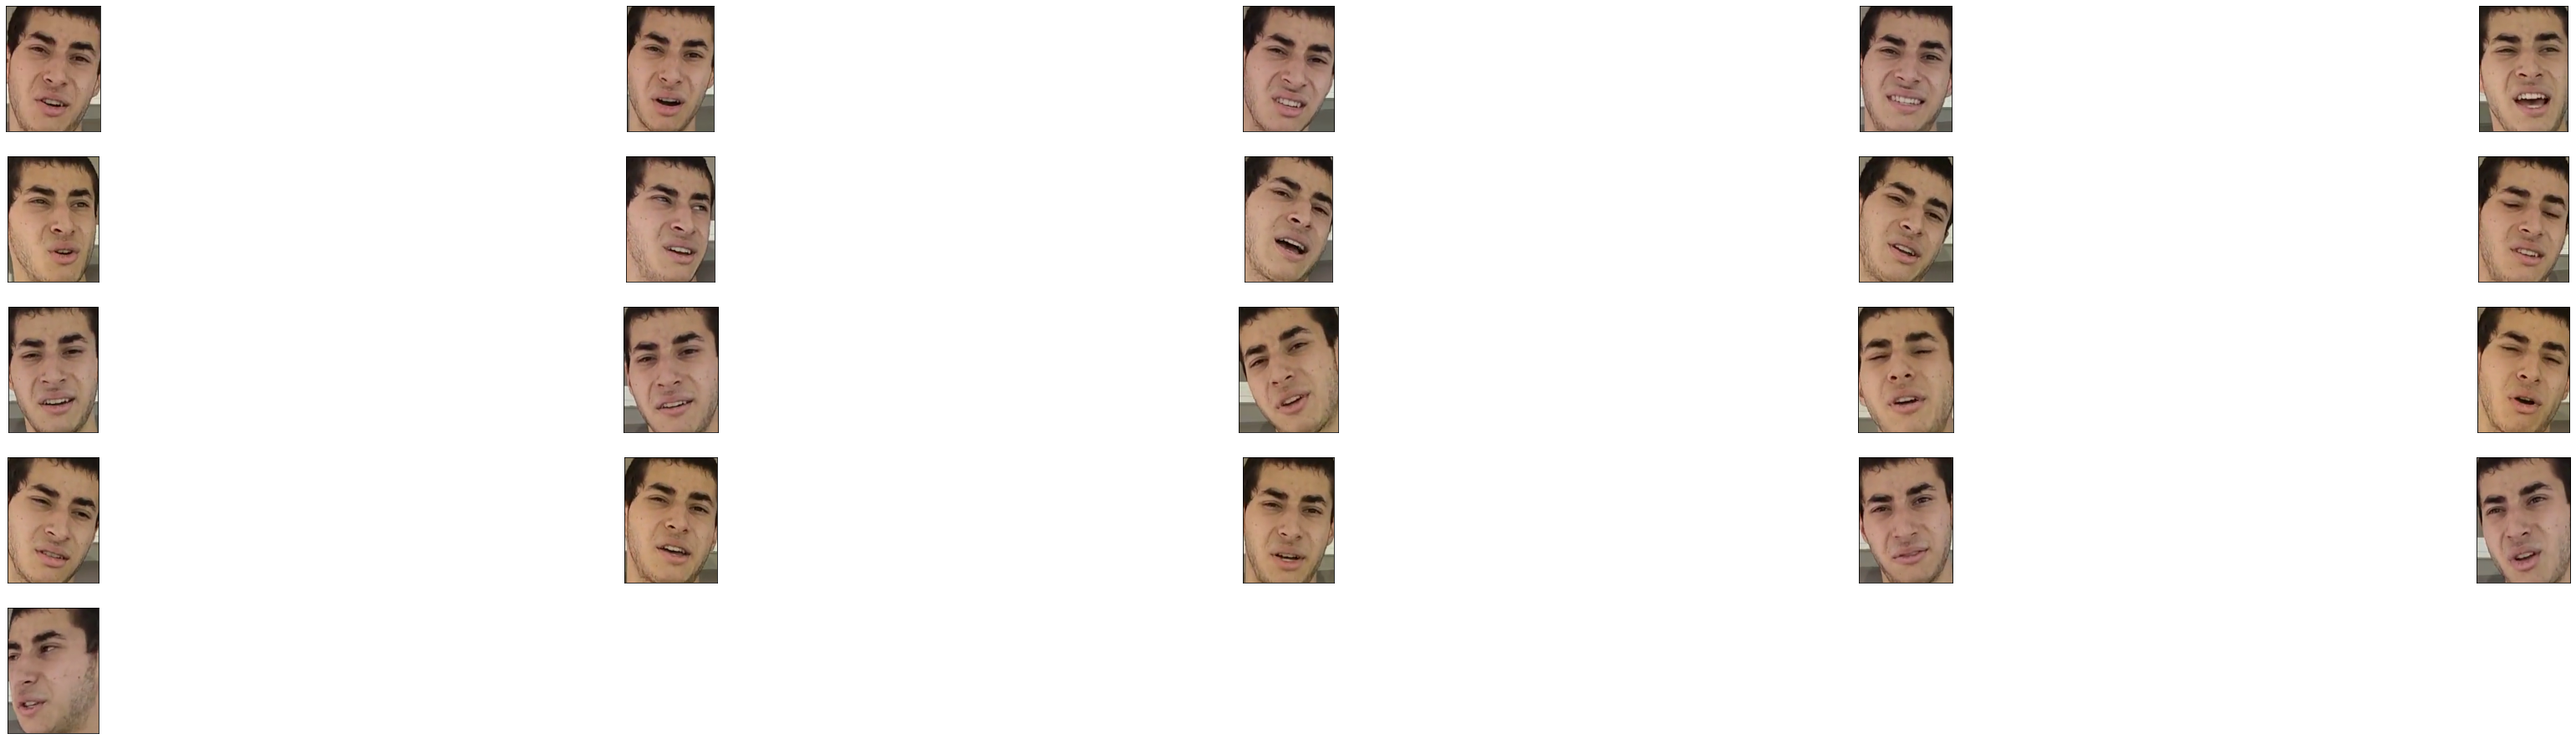

In [9]:
display_images(faces)

In [36]:
from IPython.display import Video
Video(video.path, embed=True, width=640)

In [29]:
res = mtcnn.detect(frames)

In [30]:
boxes, preds = res

for b, p in zip(boxes, preds):
    print(b,p)

None [None]


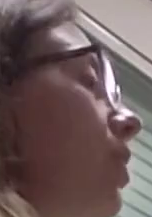

In [27]:
frames[0].crop(boxes[0][-1])

In [30]:
new_boxes, new_preds = [], []

for b, p in zip(boxes, preds):
    new_boxes.append(b[:2].tolist())
    new_preds.append(p[:2].tolist())

for b, p in zip(new_boxes, new_preds):
    print(b,p)

[[521.9569702148438, 581.5245361328125, 658.1963500976562, 765.8917236328125], [1115.2301025390625, 556.6973876953125, 1253.5792236328125, 736.3832397460938]] [0.9999961853027344, 0.9999966621398926]
[[526.6951293945312, 584.4192504882812, 663.7160034179688, 767.6668701171875], [1115.225830078125, 556.8353271484375, 1253.3232421875, 736.2429809570312]] [0.9999970197677612, 0.9999967813491821]
[[1112.609619140625, 556.9971923828125, 1251.41748046875, 737.1914672851562], [527.1154174804688, 589.3021850585938, 665.258056640625, 769.4600830078125]] [0.9999939203262329, 0.9999966621398926]
[[1109.0426025390625, 558.2617797851562, 1249.4298095703125, 740.1680297851562], [529.0653076171875, 591.0748901367188, 666.1307373046875, 768.3404541015625]] [0.9999971389770508, 0.9999954700469971]
[[1110.40380859375, 558.5504150390625, 1249.2852783203125, 743.2093505859375], [525.092529296875, 585.0186767578125, 662.9552612304688, 767.2464599609375]] [0.999996542930603, 0.9999983310699463]
[[525.688354

In [19]:
for i, (id, row) in enumerate(face_coordinates.iterrows()):
    for j, r in enumerate(row):
        if r is not None and type(r) == list:
            if len(r) > 2:
                print(i, j, id, len(r))
        

26 5 kiyvsruaai.mp4 3
26 13 kiyvsruaai.mp4 3
26 14 kiyvsruaai.mp4 3
26 15 kiyvsruaai.mp4 3
28 0 dcfodaqazt.mp4 3
28 2 dcfodaqazt.mp4 3
28 9 dcfodaqazt.mp4 3
28 10 dcfodaqazt.mp4 3
28 11 dcfodaqazt.mp4 3
28 12 dcfodaqazt.mp4 3
28 13 dcfodaqazt.mp4 3
28 15 dcfodaqazt.mp4 3
29 4 yjkcewkhhn.mp4 3
29 5 yjkcewkhhn.mp4 3
29 6 yjkcewkhhn.mp4 3
29 8 yjkcewkhhn.mp4 3
29 10 yjkcewkhhn.mp4 3
39 5 ijptktlyfr.mp4 3
40 12 qswlzfgcgj.mp4 3
40 14 qswlzfgcgj.mp4 3
44 9 ypgayhhaxx.mp4 3
65 15 qxzuuzvpmg.mp4 3
102 11 prwsfljdjo.mp4 3
102 12 prwsfljdjo.mp4 3
108 13 llplvmcvbl.mp4 3
121 5 ihglzxzroo.mp4 3
